In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import labwork
from labwork import *

In [6]:
help(labwork)

Help on module labwork:

NAME
    labwork

FUNCTIONS
    bordering(V)
    
    eval_mnk(x, y)
    
    linPlot(x, y, xlabel='', ylabel='', title='', figsize=(14, 7), fontsize=15, labplot=False, plot_to_zero=False)
        Строит график измерений x,y и линейное приближение
        зависимости по МНК (y = bx + a).
        Возвращает: a, b, sigma_a, sigma_b
    
    plotIntervals(x, x_std, y, y_std, xlabel='Значения', ylabel='Номер измерения', title='', fontsize=15)
        Строит сравнительный график значений x[i] c y[i],
        где x_std[i] и y_std[i] - их стандартные отклонения
    
    plt_lab_figure(X_max, Y_max, X_min=0, Y_min=0, k_off_x=1.05, k_off_y=1.05)
    
    prodErrorR(errors)
    
    prodErrorR_degs(errors)
    
    sciPrintD(val, dErr, name=None)
    
    sciPrintR(val, relErr, name=None)
    
    sciRoundR(V, V_R, unit='')
        По числу V и его относительной погрешности V_R
        возвращает строку, в которой число округлено по
        правилам лобораторных работ
  

In [7]:
# миллитесламетр

v = np.array([
    [-2.25, 0],
    [-2.77,0.5],
    [-3.37, 1.],
    [-4.14, 1.5],
    [-5.17, 2.],
    [-6.23, 2.5],
    [-7.40, 3.],
    [-8.75, 3.5],
    [-9.98, 4.],
    [-11.05, 4.5],
    [-12.10, 5.],
    [-12.9, 5.5],
    [-13.53, 6.],
    [-13.97, 6.5],
    [-14.37, 7.],
    [-14.62, 7.5],
    [-14.86, 8.],
    [-15.01, 8.5],
    [-15.11, 9.],
    [-15.20, 9.5],
    [-15.25, 10.],
    [-15.28, 10.5],
    [-15.32, 11.],
    [-15.34, 11.5],
    [-15.34, 12.],  # max 
    [-15.32, 12.5],
    [-15.28, 13.],
    [-15.23, 13.5],
    [-15.13, 14.],
    [-15.01, 14.5],
    [-14.82, 15.],
    [-14.61, 15.5],
    [-14.37, 16.],
    [-13.91, 16.5],
    [-13.45, 17.],
    [-12.82, 17.5],
    [-12.04, 18.],
    [-11.21, 18.5],
    [-10.00, 19.],
    [-8.69, 19.5],
    [-7.20, 20.],
    [-6.20, 20.5],
    [-5.04, 21],
])

v[:, 0] = - v[:, 0]
mx = v[np.argmax(v[:,0]),:]

df = pd.DataFrame()
df[r"$B(x) [мТл]$"] = v[:, 0]
df[r"$x [См]$"] = v[:, 1]
df

,$B(x) [мТл]$,$x [См]$
0,2.25,0.0
1,2.77,0.5
2,3.37,1.0
3,4.14,1.5
4,5.17,2.0
5,6.23,2.5
6,7.40,3.0
7,8.75,3.5
8,9.98,4.0
9,11.05,4.5


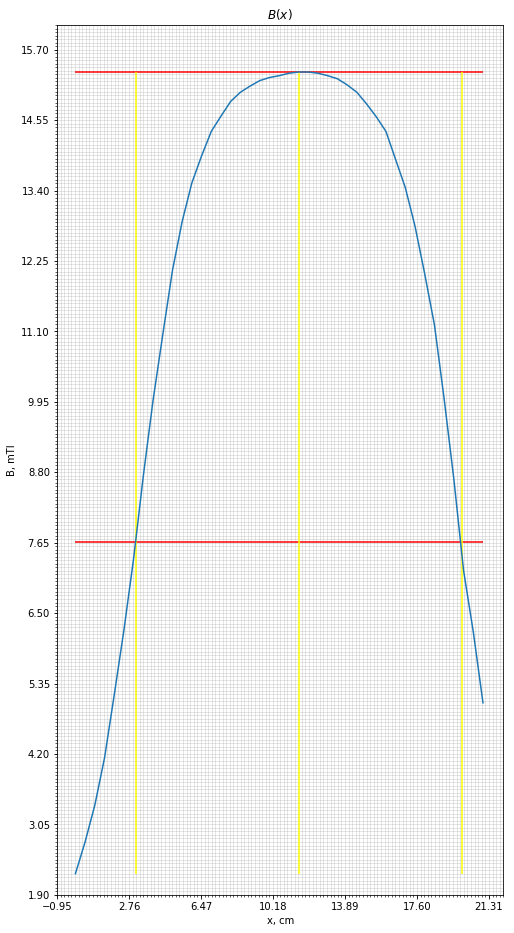

In [122]:
# plt.figure(figsize=(14,7))
plt_lab_figure(v[:, 1].max(), v[:, 0].max(), X_min=-1, Y_min=2, k_off_x=1.05, k_off_y=1.05)
plt.plot(v[:, 1], v[:, 0])
plt.hlines(v[:, 0].max(), v[:,1].min(), v[:,1].max(), color="red")

plt.hlines(v[:, 0].max() /2., v[:,1].min(), v[:,1].max(), color="red")

amax = 11.5
l = (amax - 3.1) * 2 # argmax - arg(max/2) ( +- delta l = 0.5 (цена деления))

plt.vlines(amax, v[:,0].min(), v[:,0].max(), color="yellow")
plt.vlines(amax - l / 2, v[:,0].min(), v[:,0].max(), color="yellow")
plt.vlines(amax + l / 2, v[:,0].min(), v[:,0].max(), color="yellow")
plt.title("$B(x)$")
plt.xlabel('x, cm')
plt.ylabel('B, mTl')

plt.grid()
plt.show()


In [36]:
a = np.array([
    [-8.12, 0.5],
    [-9.52, 0.6],
    [-11.07, 0.7],
    [-12.62, 0.8],
    [-14.30, 0.9],
    [-16.02, 1.0],
    [-17.32, 1.1],
    [-18.99, 1.2],
    [-20.4, 1.3],
    [-22.2, 1.4],
    [-23.6, 1.5],
    [-25.2, 1.6],
    [-26.6, 1.7],
    [-28.2, 1.8],
    [-29.9, 1.9],
    [-31.4, 2.0],
    [-33.0, 2.1],
    [-34.5, 2.2],
    [-35.9, 2.3],
])

a[:, 0] = - a[:, 0]
df = pd.DataFrame()
df[r"$B(I) [мТл]$"] = a[:, 0]
df[r"$I [A]$"] = a[:, 1]
df

,$B(I) [мТл]$,$I [A]$
0,8.12,0.5
1,9.52,0.6
2,11.07,0.7
3,12.62,0.8
4,14.30,0.9
5,16.02,1.0
6,17.32,1.1
7,18.99,1.2
8,20.40,1.3
9,22.20,1.4


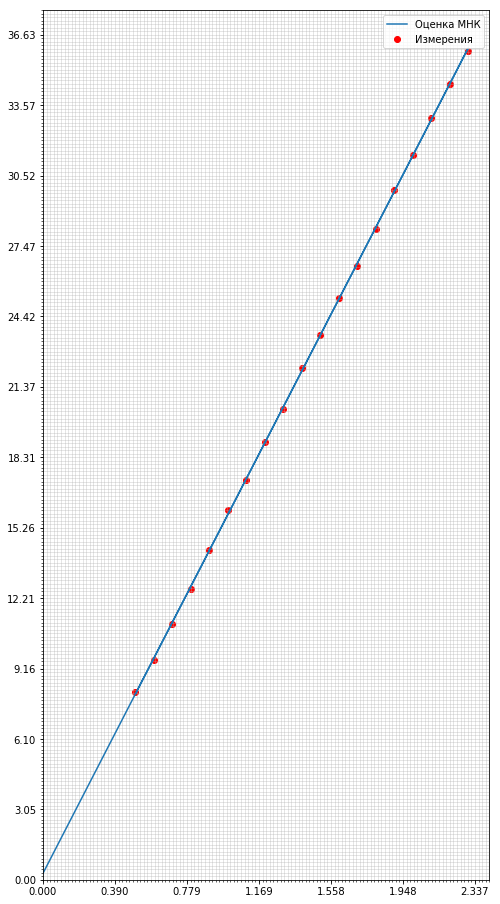

In [37]:
# plt.figure(figsize=(14, 7))
va, vb, sigma_va, sigma_vb = linPlot(a[:, 1], a[:, 0], labplot=True, plot_to_zero=True)

In [50]:
nu0 = 4*np.pi*10**(-7)
# B = nu0 * I * n

sciPrintR(l, 0.5 / l, "l = ")
N = vb * 1e-3 / nu0 * (l*0.01)
N_RE = prodErrorR([0.5/l, sigma_va])
n = vb * 1e-3 / nu0 * 0.01
n_RE = prodErrorR([sigma_va])
sciPrintR(N, N_RE , "N = ")
sciPrintR(n, n_RE, "n [на сантиметр] = ")

l =  16.8 +- 0.5 ( 2.976190476190476 %)
N =  2078.60041371 +- 75.5384567386 ( 3.63410188126 %)
n [на сантиметр] =  123.726215102 +- 2.58021424783 ( 2.08542243509 %)


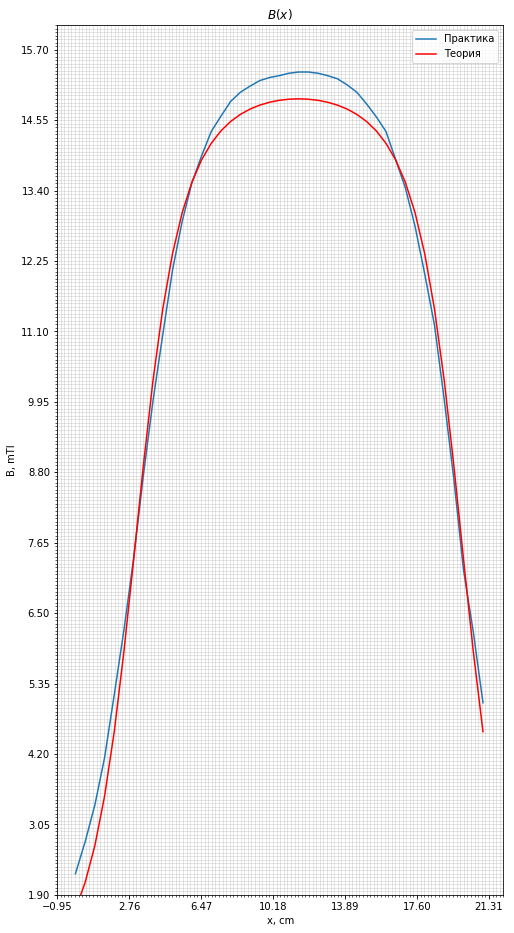

In [71]:
d = 5
L = l
i = n * 100
    
def Btheor(z):
    dz = z - 3.1
    return nu0 / 2 * i *((L - dz) / ((L - dz)**2 + d*d/4)**0.5 + dz/(dz*dz + d*d/4)**0.5)

#plt.figure(figsize=(14,7))
plt_lab_figure(v[:, 1].max(), v[:, 0].max(), X_min=-1, Y_min=2, k_off_x=1.05, k_off_y=1.05)
plt.plot(v[:, 1], v[:, 0], label="Практика")
plt.plot(v[:, 1], Btheor(v[:, 1]) *1000, color="red", label="Теория")
plt.title("$B(x)$")
plt.xlabel('x, cm')
plt.ylabel('B, mTl')
plt.legend()
plt.grid()
plt.show()

_________________________

_________________________

In [126]:
Bs = np.array([312, 416, 441, 427, 452, 435, 442, 442, 458, 442, 445, 460, 450])
Bs / 450 * 18 
# k = 18 / 450
# np.arange(19) / k

array([ 12.48,  16.64,  17.64,  17.08,  18.08,  17.4 ,  17.68,  17.68,
        18.32,  17.68,  17.8 ,  18.4 ,  18.  ])

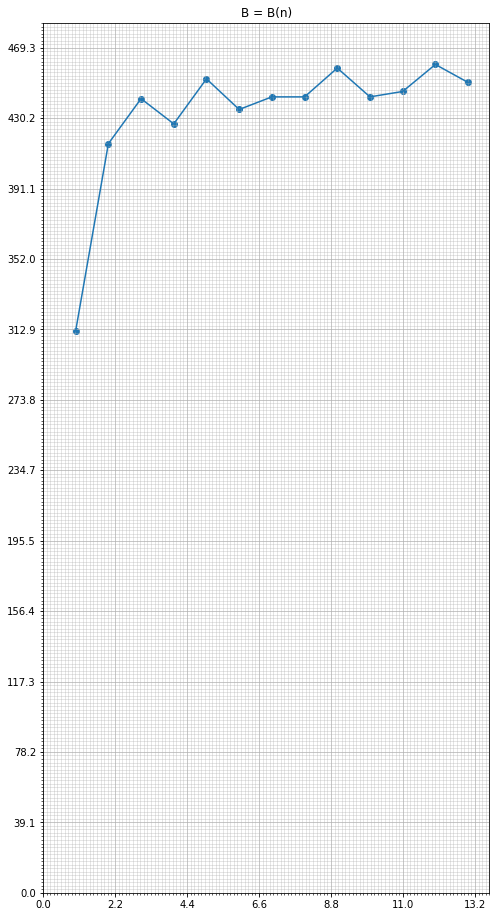

In [123]:
Bs = np.array([312, 416, 441, 427, 452, 435, 442, 442, 458, 442, 445, 460, 450])
# plt.figure(figsize=(14, 7))
plt_lab_figure(len(Bs), Bs.max(), X_min=0, Y_min=0, k_off_x=1.05, k_off_y=1.05)
plt.plot(np.arange(1, len(Bs) + 1), Bs)
plt.scatter(np.arange(1, len(Bs) + 1), Bs)
plt.title("B = B(n)")
plt.show()

In [103]:
b1 = 314 # 320
b2 = 314
d2 = d1 = 1e-2#sm
h2 = h1 = 4.9 * 1e-3 # mm
H = 3.3 * 1e-2 # 2.9-3.1 sm
m1 = 2.946 * 1e-3 # g
m2 = 2.907 * 1e-3 # g


In [104]:
Br_0 = 2. * Bs[0]* ((d1/2)**2 + (h1) **2) ** 0.5 / h1 * 1e-3
Br_0_RE = prodErrorR_degs([(1e-2, 2), (1e-2, 2), (10/b1, 1)])
sciPrintR(Br_0, Br_0_RE, "Br_0 = ")

Br_0 =  0.891519528887 +- 0.0379732895945 ( 4.25938954382 %)


In [131]:
Pm = ((m2 * 9.8) * 4 * np.pi * (H ** 4) / (nu0 * 6)) ** 0.5 # ++
Pm_RE = prodErrorR_degs([(0.05 / 3, 4)])
sciPrintR(Pm, Pm_RE, "Pm = ")
pm = Pm / (np.pi * (d1 / 2) ** 2 * h1)
print(pm)
Br = Pm / (np.pi * (d1 / 2) ** 2 * h1) * nu0
Br_RE = prodErrorR_degs([(1e-2, 2), (1e-2, 2), (0.05 / 3, 4), (Pm_RE, 1)])
sciPrintR(Br, Br_RE, "Br = ")

Pm =  0.237294574318504 +- 0.0158196382879 ( 6.66666666667 %)
616597.6240273801
Br =  0.7748394263461356 +- 0.076269113534 ( 9.84321537349 %)


In [107]:
T = 42.84 / 20
T # 2.34 

2.1420000000000003

In [108]:
T2 = 19.09 / 10
T2

1.909

In [139]:
r = 0.5e-2 # * 1e-2
h = 5.9  * 1e-2 # sm,  = 0.49 * 12
m = ((m1 + m2) /2 * 12) # 38.895
#J = m1 * (3 ** r **2 + h ** 2) /12
J = m * ((2*r) **2 + (h) ** 2) /12
J_RE = prodErrorR_degs([(0.01 / 1.0, 2)])
Bh = J  / ((T / (2. * np.pi)) ** 2 * (Pm * 12))
Bh_RE = prodErrorR_degs([(J_RE, 1), (0.1 / T, 2)])
sciPrintR(Bh, Bh_RE, "Bh = ")  # табличное значение - 20 мкТл

Bh =  3.166683060045888e-05 +- 3.02382321965e-06 ( 9.54886599737 %)


In [ ]:
# 28, 29

# Pm inS / V 